In [21]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('bfro_reports_geocoded.csv',na_values=np.nan)

In [31]:
df.head()
df.shape

(4586, 27)

In [32]:
df_geocoded = df[ ~ df['latitude'].isnull()]
df_geocoded = df[ ~ df['longitude'].isnull()]

df_geocoded.shape

(3659, 27)

In [64]:
def point_round(x, prec=2, base=.2):
    return round(base * round(float(x)/base),prec)

df_geocoded['rounded_lat'] = df_geocoded.latitude.apply(point_round)
df_geocoded['rounded_lng'] = df_geocoded.longitude.apply(point_round)
df_geocoded.head()

/Users/mariepatino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/mariepatino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,observed,location_details,county,state,title,latitude,longitude,date,number,classification,...,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed,rounded_lat,rounded_lng
3,My two children and I were returning from Altu...,The creature crossed from one cattle pasture t...,Washita County,Oklahoma,Report 9765: Motorist and children have daylig...,35.30110,-99.17020,1973-09-28,9765.0,Class A,...,0.00,NaN,1017.29,Partly cloudy starting in the afternoon.,6.0,10.00,263.0,8.15,35.4,-99.3
4,I was staying the night with a friends of mine...,"Vincent, Ohio (In theWayne National Forest)",Washington County,Ohio,Report 4983: Sighting and vocalizations at a h...,39.38745,-81.67339,1971-08-01,4983.0,Class A,...,0.21,rain,1022.74,Mostly cloudy throughout the day.,6.0,4.97,156.0,3.02,39.3,-81.6
5,My family had moved from the city of Rochester...,"East on Route 104, near town of Huron.",Wayne County,New York,"Report 26566: Man observes tall, white hair-co...",43.27314,-76.89331,2003-09-20,26566.0,Class A,...,0.21,rain,1020.75,Partly cloudy until evening.,4.0,9.53,253.0,8.73,43.2,-76.8
6,I grew up in Northwestern Nevada along the Cal...,"The Western face of Peavine Mountain, Northwes...",Washoe County,Nevada,Report 5692: Father and son hear vocalizations...,39.59200,-119.97500,1970-09-01,5692.0,Class B,...,0.00,NaN,1011.96,Clear throughout the day.,9.0,9.76,197.0,1.96,39.6,-120.0
8,I was on my way to Claremont from Lebanon on R...,Close to Claremont down 120 not far from Kings...,Sullivan County,New Hampshire,Report 55269: Dawn sighting at Stevens Brook o...,43.41549,-72.33093,2016-06-07,55269.0,Class A,...,0.30,rain,999.41,Rain in the evening.,8.0,9.47,234.0,2.47,43.5,-72.3


(-150, -50)

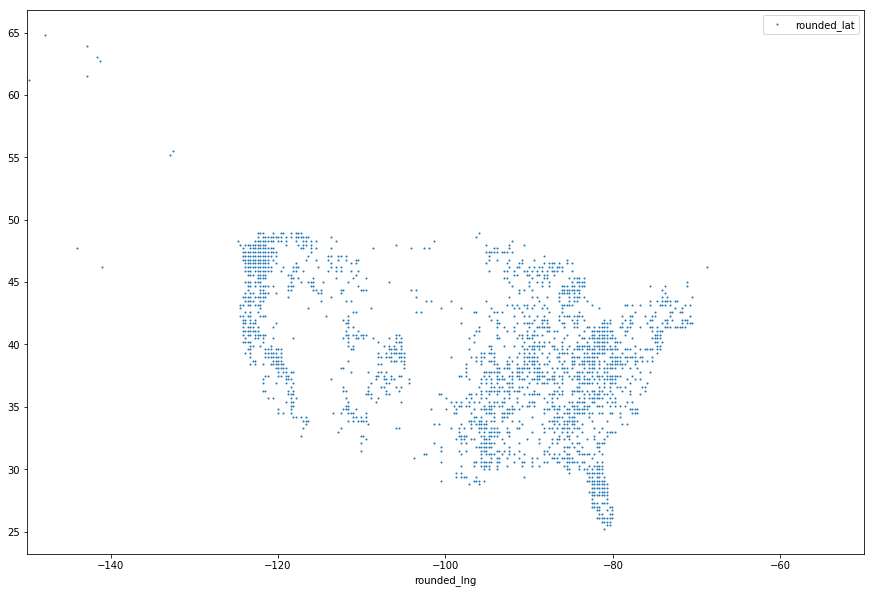

In [65]:
ax = df_geocoded.groupby(by=['rounded_lat', 'rounded_lng']).size().reset_index().plot(x='rounded_lng', y='rounded_lat', marker='o', linestyle='', ms=1, figsize=(15,10))
ax.invert_xaxis()
ax.set_xlim((-150, -50))



In [66]:
df_geocoded.groupby(by=['rounded_lat', 'rounded_lng']).size().reset_index().to_csv('dots_for_map.csv')

In [67]:
points = df_geocoded.groupby(by=['rounded_lat', 'rounded_lng']).size().reset_index()

In [68]:
points.rounded_lng = points.rounded_lng.astype(float)

In [69]:
points.sort_values('rounded_lng')
points[points.rounded_lng > -130].sort_values('rounded_lng').to_csv('dots_without_alaska.csv')